### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#1. Análisis de facturación



In [ ]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"


In [ ]:
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


In [ ]:
print(df_total.head())
print(df_total.info())


            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      16/01/2021      Pedro Gomez          Bogotá             4   
1      18/05/2022  Beatriz Morales        Medellín             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medellín             5   

       Método de pago  Cantidad de cuotas       lat       lon    Tienda  
0  Tarjeta de crédito                   8   4.60971 -74.08175  Tienda 1  
1  T

In [ ]:
# Verificar nombres de columnas
print(df_total.columns)


Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [ ]:
ingresos_por_tienda = df_total.groupby("Tienda")["Precio"].sum().sort_values(ascending=False)

print("Facturación total por tienda:\n")
print(ingresos_por_tienda)


Facturación total por tienda:

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


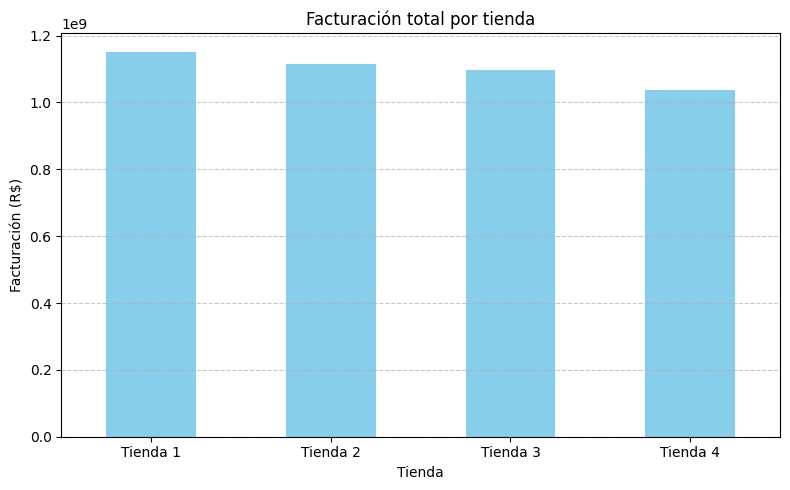

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
ingresos_por_tienda.plot(kind="bar", color="skyblue")
plt.title("Facturación total por tienda")
plt.xlabel("Tienda")
plt.ylabel("Facturación (R$)")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [ ]:
ventas_categoria = df_total.groupby("Categoría del Producto")["Precio"].sum().sort_values(ascending=False)

print("Ventas totales por categoría:\n")
print(ventas_categoria)


Ventas totales por categoría:

Categoría del Producto
Electrónicos               1.660576e+09
Electrodomésticos          1.324751e+09
Muebles                    7.576610e+08
Instrumentos musicales     3.487726e+08
Deportes y diversión       1.429777e+08
Juguetes                   7.360440e+07
Artículos para el hogar    5.757980e+07
Libros                     3.769610e+07
Name: Precio, dtype: float64


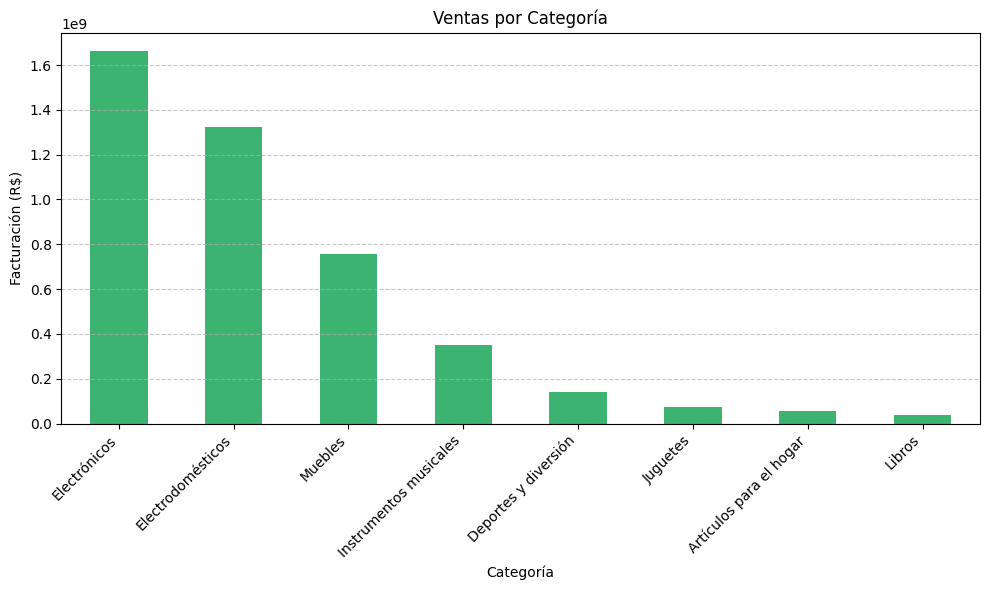

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
ventas_categoria.plot(kind="bar", color="mediumseagreen")
plt.title("Ventas por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Facturación (R$)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# 3. Calificación promedio de la tienda


In [ ]:
print(df_total.columns)



Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')


In [ ]:
calificacion_promedio = df_total.groupby("Tienda")["Calificación"].mean().round(2).sort_values(ascending=False)



In [ ]:
print("Calificación promedio por tienda:\n")
print(calificacion_promedio)

Calificación promedio por tienda:

Tienda
Tienda 3    4.05
Tienda 2    4.04
Tienda 4    4.00
Tienda 1    3.98
Name: Calificación, dtype: float64


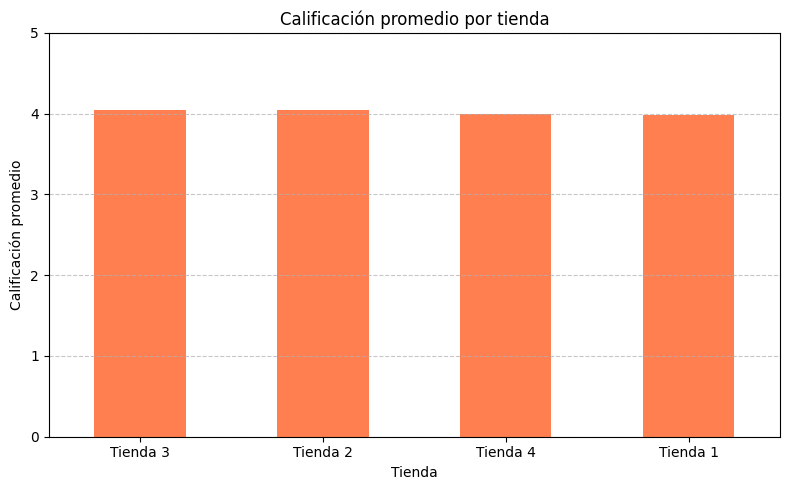

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
calificacion_promedio.plot(kind="bar", color="coral")
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5)
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [ ]:
ventas_por_producto = df_total["Producto"].value_counts()


In [ ]:
print("Top 10 productos más vendidos:")
print(ventas_por_producto.head(10))


Top 10 productos más vendidos:
Producto
Mesa de noche                210
Carrito de control remoto    206
Microondas                   206
Batería                      203
Cama king                    201
Secadora de ropa             200
Modelado predictivo          200
Set de ollas                 200
Cama box                     199
Bloques de construcción      199
Name: count, dtype: int64


In [ ]:
print("Top 10 productos menos vendidos:")
print(ventas_por_producto.tail(10))



Top 10 productos menos vendidos:
Producto
Olla de presión                172
Smartwatch                     172
Set de vasos                   169
Sillón                         168
Asistente virtual              167
Ciencia de datos con Python    166
Guitarra eléctrica             165
Mochila                        163
Auriculares con micrófono      158
Celular ABXY                   157
Name: count, dtype: int64


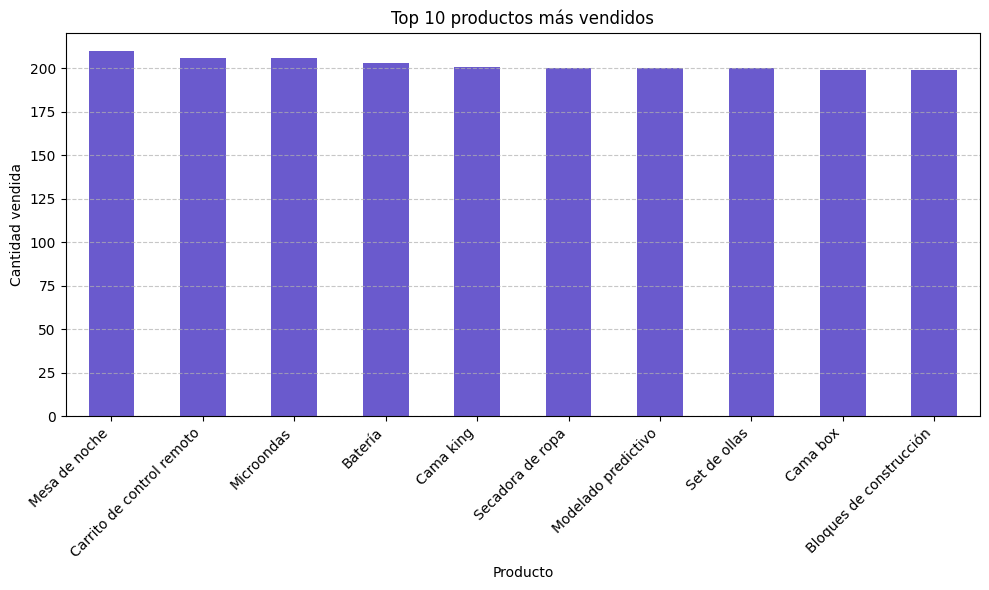

In [ ]:
ventas_por_producto.head(10).plot(kind="bar", figsize=(10,6), color="slateblue")
plt.title("Top 10 productos más vendidos")
plt.xlabel("Producto")
plt.ylabel("Cantidad vendida")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# 5. Envío promedio por tienda

In [ ]:
compra_promedio = df_total.groupby("Lugar de Compra")["Precio"].mean().round(2).sort_values(ascending=False)

print("Compra promedio por tienda:")
print(compra_promedio)


Compra promedio por tienda:
Lugar de Compra
Soacha           648300.00
Inírida          577707.14
Cúcuta           534242.47
Neiva            522450.00
Pasto            521428.72
Cali             503005.06
Bucaramanga      500404.97
Medellín         473927.92
Leticia          472886.62
Manizales        472387.80
Bogotá           460273.47
Villavicencio    459779.31
Riohacha         453249.69
Armenia          437246.43
Pereira          436996.71
Barranquilla     425937.10
Cartagena        423044.21
Valledupar       420450.00
Santa Marta      351658.94
Name: Precio, dtype: float64


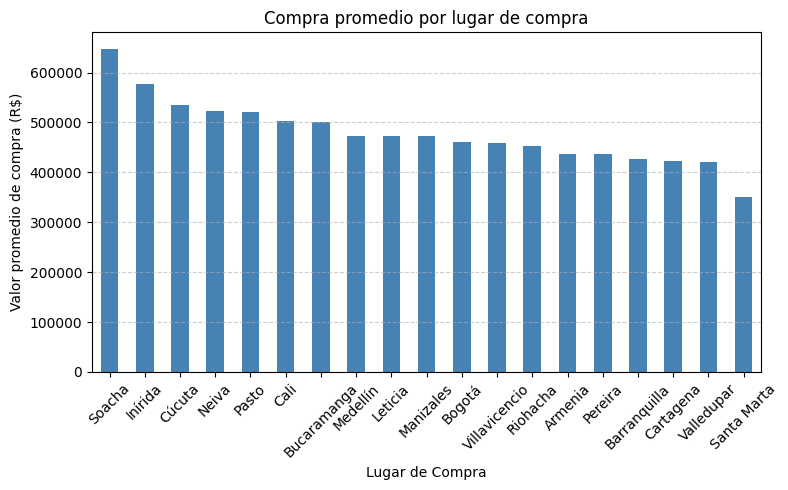

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
compra_promedio.plot(kind="bar", color="steelblue")
plt.title("Compra promedio por lugar de compra")
plt.ylabel("Valor promedio de compra (R$)")
plt.xlabel("Lugar de Compra")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


Recomendación Final para el Sr. Juan


Tras analizar los datos de ventas, facturación, reseñas y costos de envío de las cuatro tiendas de Alura Store, se pueden identificar patrones claros de desempeño entre ellas.

Como:

*Facturación total*: La Tienda 1 y la Tienda 2 presentan los mayores ingresos, lo que indica una fuerte presencia comercial.

*Productos más vendidos y categorías:* Hay una concentración importante de ventas en categorías como Tecnología y Moda, especialmente en Tienda 1.

*Calificación promedio:* La Tienda 4 tiene las calificaciones más bajas, lo que puede reflejar problemas de atención al cliente o calidad del servicio.

*Costo de envío y compra promedio:* La Tienda 4 también presenta un costo de envío más alto en comparación con sus ventas promedio, lo cual reduce su eficiencia.

🔍 Conclusión:

Se recomienda vender la Tienda 4, ya que presenta el rendimiento más bajo en varios indicadores: menor facturación, menor calificación promedio de los clientes y un costo de envío poco competitivo. Esta tienda representa una oportunidad para optimizar recursos e invertir en un nuevo emprendimiento que pueda generar mejores retornos.